# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [54]:
# Otra forma de agregar los nombres de las columnas
# df.columns = list(names)

In [55]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

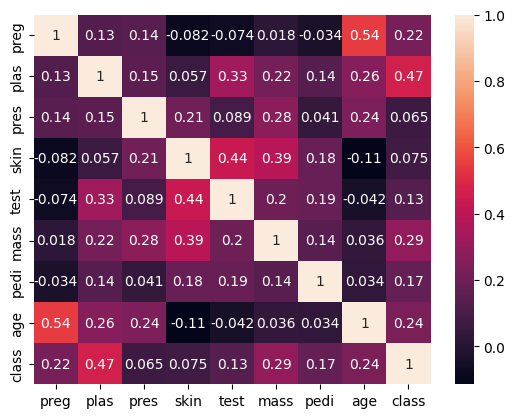

In [58]:
sns.heatmap(df.corr(), annot=True)

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [59]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]

features = df.drop(columns=["class"])
target = df["class"]

In [60]:
# Muestra el shape de ambos conjuntos

print(features.shape)
print(target.shape)

(768, 8)
(768,)


In [61]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed

seed = 7

In [62]:
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score, KFold

In [63]:
# Instancia un Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [64]:
DecisionTreeClassifier??

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are 

In [65]:
# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado

estimator = DecisionTreeClassifier(max_depth=3,random_state=seed)

bag_clf = BaggingClassifier (n_estimators = 100,
                             estimator=estimator) 



In [66]:
# Instancia 10 KFolds en la variable kfold

from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state= seed)


In [50]:
# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio


cv = cross_val_score( estimator=bag_clf,
                X = features,
                y = target,
                cv=kfold,
                scoring="accuracy"
                )

cv


array([0.80519481, 0.75324675, 0.7012987 , 0.79220779, 0.81818182,
       0.79220779, 0.71428571, 0.71428571, 0.76315789, 0.72368421])

In [67]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >


cv.mean()

0.757775119617225

0.7720437457279563

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado

rnd_clf = RandomForestClassifier(n_estimators=100,
                       max_features= 3,
                       random_state=seed)



In [92]:

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

cv_2_rnd = cross_val_score( estimator=rnd_clf,
                X = features,
                y = target,
                cv=kfold,
                scoring="accuracy"
                )

cv_2_rnd


array([0.77922078, 0.75324675, 0.7012987 , 0.75324675, 0.80519481,
       0.80519481, 0.67532468, 0.80519481, 0.80263158, 0.71052632])

In [93]:
# Obtén la media del cross validation score para el Random Forest Classifier

cv_2_rnd.mean()

0.759107997265892

0.7733766233766234

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
AdaBoostClassifier??

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
Source:        
class AdaBoostClassifier(
    _RoutingNotSupportedMixin, ClassifierMixin, BaseWeightBoosting
):
    """An AdaBoost classifier.

    An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
    classifier on the original dataset and then fits additional copies of the
    classifier on the same dataset but where the weights of incorrectly
    classified instances are adjusted such that subsequent classifiers focus
    more on difficult cases.

    This class implements the algorithm based on [2]_.

    Read more in the :ref:`User Guide <adaboost>`.

    .. versionadded:: 0.14

    Parameters
    ----------
    estimator : object, default=None
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required, as well as proper
        ``classes_`` and 

In [94]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado

ada_clf = AdaBoostClassifier(n_estimators=30, random_state=seed)

# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio
cv_3_ada = cross_val_score(estimator=ada_clf,
                      X= features,
                      y = target,
                      scoring="accuracy",
                      cv= kfold                      
                      )
cv_3_ada



c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

array([0.76623377, 0.71428571, 0.71428571, 0.79220779, 0.79220779,
       0.74025974, 0.68831169, 0.77922078, 0.80263158, 0.76315789])

In [95]:
# Obtén la media del cross validation score para el AdaBoost Classifier


cv_3_ada.mean()

0.7552802460697198

0.760457963089542

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado

gb_clf = GradientBoostingClassifier(n_estimators= 100,
                                    random_state= seed)

# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

cv_4_gb = cross_val_score(estimator= gb_clf,
                         X = features,
                         y = target,
                         cv= kfold,
                         scoring="accuracy",
                         )

cv_4_gb

array([0.77922078, 0.76623377, 0.67532468, 0.77922078, 0.79220779,
       0.76623377, 0.63636364, 0.80519481, 0.82894737, 0.75      ])

In [97]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation  :)
# Jajjajaja

cv_4_gb.mean()

0.7578947368421053

0.7681989063568012

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
#!pip install xgboost

In [87]:
from xgboost import XGBClassifier

In [90]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado

xgb_clf = XGBClassifier( n_estimators= 100,
                        random_state = seed
)

# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold

cv_5_xgb = cross_val_score( estimator=xgb_clf,
                          X = features,
                         y = target,
                         cv= kfold,
                         scoring="accuracy",
                         )

cv_5_xgb
# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

array([0.7012987 , 0.71428571, 0.68831169, 0.76623377, 0.74025974,
       0.72727273, 0.63636364, 0.79220779, 0.78947368, 0.71052632])

In [91]:
# la mean de la wea que acabamos de hacer

cv_5_xgb.mean()

0.7266233766233766

0.7395591250854407

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [98]:
result = [cv.mean(), cv_2_rnd.mean(), cv_3_ada.mean(), cv_4_gb.mean(), cv_5_xgb.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.759108
GradientBoosting    0.757895
Bagging DT          0.757775
Ada Boost           0.755280
XGBoost             0.726623
dtype: float64

In [45]:
result = [results_cv.mean(), results_cv_rfc.mean(), results_cv_ada.mean(), results_cv_gb.mean(), results_cv_xgb.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.773377
Bagging DT          0.772044
GradientBoosting    0.768199
Ada Boost           0.760458
XGBoost             0.739559
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test